In [6]:
%matplotlib inline
from netCDF4 import Dataset
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from spharm import Spharmt
from tqdm import tqdm
import sys

from matplotlib.ticker import AutoMinorLocator

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
cmap = ListedColormap(sns.color_palette("coolwarm", 9).as_hex())
sns.reset_orig()

matplotlib.rcParams['lines.linewidth'] = 0.6

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['legend.frameon'] = False

matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['axes.facecolor'] = '#F8F8FF'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['axes.labelsize'] = 7

matplotlib.rcParams['grid.linestyle'] = '-.'
matplotlib.rcParams['grid.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.7


In [11]:
nlons = 72
nlats = 36
grid = Spharmt(nlons,nlats,gridtype='regular',rsphere=3371e3)

tmpspec =  grid.grdtospec(np.zeros((nlats, nlons)), ntrunc=12)
print (tmpspec.size)

91


In [14]:
for j in sorted(glob.glob('./../model_run/wrfrst_d01*')):
    if('_0036' in j) | ('_0037' in j) | ('_0038' in j):
        filedir = j
        print (j)
        data = Dataset(filedir, 'a')
        t2 = data.variables['T_2'][:][0,0]
        t1 = data.variables['T_1'][:][0,0]
        
        size = 91
        pert = np.zeros((size))
        for i, num in enumerate(pert):
            tmp = np.random.uniform(-1,1)
            pert[i] = tmp
        print (pert.shape)
        pert_ext = np.tile(pert, (52,1))
        np.save(j.replace('/wrfrst_d01', '/dustL45_t12p0.001/wrfrst_d01')+'_pert.npy', pert)
        
        tmp = np.zeros((52, 36, 72))
        tmp2 = np.zeros((52, 36, 72))
        for i in np.arange(52):
            tmpspec =  grid.grdtospec(data.variables['T_2'][:][0,i], ntrunc=12)
            
            tmpspec[:size] = tmpspec[:size]*(1+0.01*pert)
            tmp[i] = grid.spectogrd(tmpspec)

            tmpspec =  grid.grdtospec(data.variables['T_1'][:][0,i], ntrunc=12)
            tmpspec[:size] = tmpspec[:size]*(1+0.01*pert)
            tmp2[i] = grid.spectogrd(tmpspec)

        data.variables['T_2'][:] = tmp[np.newaxis,:,:,:]
        data.variables['T_1'][:] = tmp2[np.newaxis,:,:,:]

        data.close()

data = Dataset(filedir, 'a')
t22 = data.variables['T_2'][:][0,0]
print (t2-t22)
data.close()

./../model_run/wrfrst_d01_0036-00086_00_00_00
(91,)
./../model_run/wrfrst_d01_0036-00186_00_00_00
(91,)
./../model_run/wrfrst_d01_0036-00286_00_00_00
(91,)
./../model_run/wrfrst_d01_0036-00386_00_00_00
(91,)
./../model_run/wrfrst_d01_0036-00486_00_00_00
(91,)
./../model_run/wrfrst_d01_0036-00586_00_00_00
(91,)
./../model_run/wrfrst_d01_0037-00017_00_00_00
(91,)
./../model_run/wrfrst_d01_0037-00117_00_00_00
(91,)
./../model_run/wrfrst_d01_0037-00217_00_00_00
(91,)
./../model_run/wrfrst_d01_0037-00317_00_00_00
(91,)
./../model_run/wrfrst_d01_0037-00417_00_00_00
(91,)
./../model_run/wrfrst_d01_0037-00517_00_00_00
(91,)
./../model_run/wrfrst_d01_0037-00617_00_00_00
(91,)
./../model_run/wrfrst_d01_0038-00048_00_00_00
(91,)
./../model_run/wrfrst_d01_0038-00148_00_00_00
(91,)
./../model_run/wrfrst_d01_0038-00248_00_00_00
(91,)
./../model_run/wrfrst_d01_0038-00348_00_00_00
(91,)
./../model_run/wrfrst_d01_0038-00448_00_00_00
(91,)
./../model_run/wrfrst_d01_0038-00548_00_00_00
(91,)
./../model_r

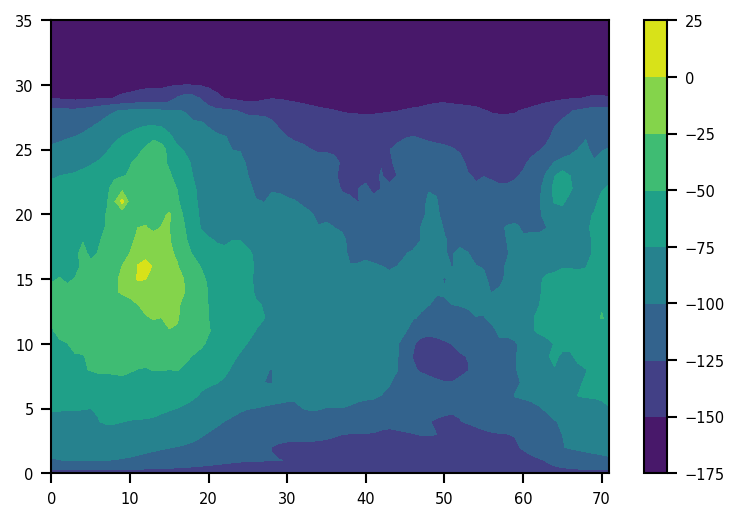

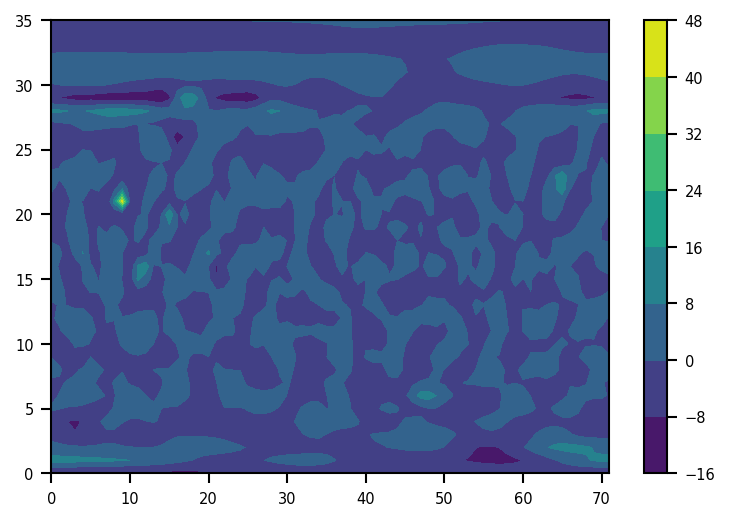

In [15]:
figure()
contourf(t1)
colorbar()

figure()
contourf(t2-t22)
colorbar()
# contourf(t1)


In [ ]:
Spharmt.grdtospec?